
# NLP

A lo largo del notebook vamos a trabajar con el siguiente dataset:

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection/


La mayoría de las herramientas de NLP pueden ser consideradas como parte del preprocesamiento, llevar el texto a una forma que la computadora pueda entender. En general, esto corresponde a una forma tipo "tabla" al estilo de los DataFrames de Pandas.


In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Propietario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [3]:
dataset.article_link[0]

'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5'

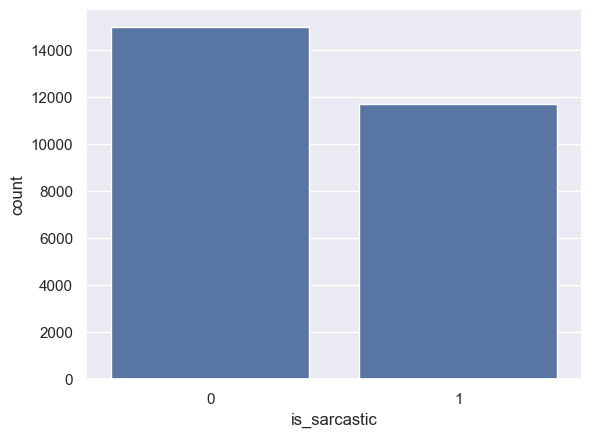

In [4]:
sns.countplot(data=dataset, x="is_sarcastic")
plt.show()

## 2. Breve exploración del dataset


In [5]:
titular = dataset.iloc[3].headline
print(titular)

boehner just wants wife to listen, not come up with alternative debt-reduction ideas


¿Te parece que es sarcástico?

In [6]:
dataset.iloc[3].is_sarcastic

1

## 3. NLTK

### Tokenización

1. `sent_tokenize`: Tokeniza un texto utilizando un unsupervised model y devuelve divido por frases

In [7]:
titular

'boehner just wants wife to listen, not come up with alternative debt-reduction ideas'

In [8]:
titular_st = nltk.tokenize.sent_tokenize(titular)
titular_st

['boehner just wants wife to listen, not come up with alternative debt-reduction ideas']

In [9]:
nltk.tokenize.sent_tokenize("hi, im Miquel. Youre a student")

['hi, im Miquel.', 'Youre a student']

2. `word_tokenize`: Por palabras

In [10]:
titular_wt = nltk.tokenize.word_tokenize(titular)
titular_wt

['boehner',
 'just',
 'wants',
 'wife',
 'to',
 'listen',
 ',',
 'not',
 'come',
 'up',
 'with',
 'alternative',
 'debt-reduction',
 'ideas']

In [11]:
nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)

['boehner',
 'just',
 'wants',
 'wife',
 'to',
 'listen',
 'not',
 'come',
 'up',
 'with',
 'alternative',
 'debt',
 'reduction',
 'ideas']

### Normalización

La normalización de texto implica varias tareas, algunas de las cuales son:

**Conversión a minúsculas**: Para asegurarnos de que todas las palabras se comparan de manera uniforme, es común convertir todo el texto a minúsculas. De esta manera, «Texto» y «texto» se considerarán iguales. 

**Eliminación de caracteres especiales**: Los caracteres especiales, como signos de puntuación o caracteres no alfabéticos, a menudo se eliminan o reemplazan por espacios en blanco.

**Eliminación de números**: En algunos casos, los números no son relevantes para el análisis de texto y se eliminan.

**Tokenización**: La tokenización es el proceso de dividir el texto en palabras o tokens individuales. Esto permite analizar cada palabra por separado y es fundamental en el procesamiento de lenguaje natural.

**Eliminación de palabras vacías**: Las palabras vacías, como «a», «de» y «en», a menudo se eliminan, ya que no aportan significado en muchos casos.



0. El texto ya esta en minúsculas

1. Stopwords

Importar los `stopwords` del inglés e imprimirlos.

In [12]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
titular_wt

['boehner',
 'just',
 'wants',
 'wife',
 'to',
 'listen',
 ',',
 'not',
 'come',
 'up',
 'with',
 'alternative',
 'debt-reduction',
 'ideas']

Eliminar del titular elegido los stopwords.

In [14]:
titular_wt_sin_sw = [word for word in titular_wt if word not in stopwords]
titular_wt_sin_sw

['boehner',
 'wants',
 'wife',
 'listen',
 ',',
 'come',
 'alternative',
 'debt-reduction',
 'ideas']

### Frecuencia de palabras

Dado el titular ya tokenizado por palabras y sin stopwords, usar `nltk` para extrar la frecuencia con que aparece cada palabras. 

In [15]:
freq = nltk.FreqDist(titular_wt_sin_sw)
freq

FreqDist({'boehner': 1, 'wants': 1, 'wife': 1, 'listen': 1, ',': 1, 'come': 1, 'alternative': 1, 'debt-reduction': 1, 'ideas': 1})

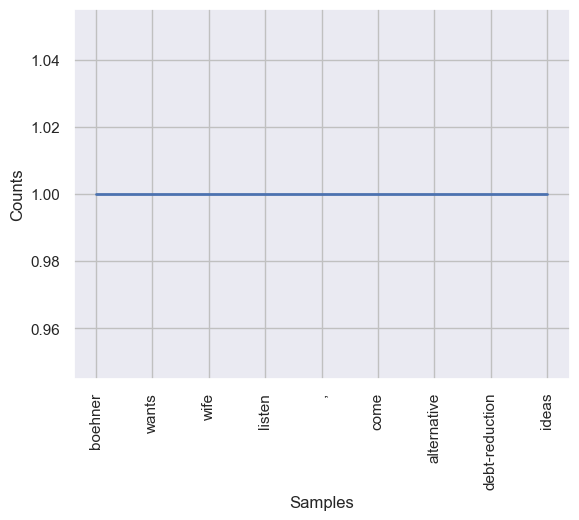

<Axes: xlabel='Samples', ylabel='Counts'>

In [16]:
freq.plot() 

### Dataset Completo

Antes de pasar a extraer features de cada instancia del Dataset, podemos hacer un pequeño análisis del **dataset en su conjunto**. Por ejemplo, una opción es agrupar todos los titulares por tipo y extraer de cada clase las palabras más frecuentes. Para ello:

1. Agrupar los titulares por tipo. Crear un dataframe para cada uno. Recuerden usar máscaras.
2. Crear una lista vacia y agregar en esa lista todos los titulares (por tipo/dataframe creado) ya tokenizados (usar el `RegexpTokenizer`) y filtrado por `stopwords`.
3. Usar el `FreqDist` en esa lista que acaban de llenar. Llevar lo que devuelve `FreqDist` a un Dataframe. Ordenar por frecuencia en que aparece cada palabra.
4. Hacer un `barplot` o similar para visualizar.
#### No-Sarcasmo

In [17]:
dataset_no_sarcasmo = dataset[dataset.is_sarcastic==0]
dataset_no_sarcasmo.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [18]:
def normaliza(titular):
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    # ahora titular es una lista
    titular = [word for word in titular if word not in stopwords]
    return titular

In [19]:
normaliza("Hi, i'm Miquel")

['Hi', 'Miquel']

In [20]:
dataset_no_sarcasmo.headline.apply(normaliza)

0        [former, versace, store, clerk, sues, secret, ...
1        [roseanne, revival, catches, thorny, political...
4        [j, k, rowling, wishes, snape, happy, birthday...
5                                [advancing, world, women]
6            [fascinating, case, eating, lab, grown, meat]
                               ...                        
26704              [american, politics, moral, free, fall]
26705                           [america, best, 20, hikes]
26706                                 [reparations, obama]
26707    [israeli, ban, targeting, boycott, supporters,...
26708                       [gourmet, gifts, foodie, 2014]
Name: headline, Length: 14985, dtype: object

In [21]:
todos_titulares_no_sarcasmo = dataset_no_sarcasmo.headline.apply(normaliza)

### Vamos a poner todas las palabras juntas para ver su frecuencia

In [22]:
L=[[1,2],
   [3,4]]

In [23]:
[y for x in L for y in x]

[1, 2, 3, 4]

In [24]:
total_numeros=[]
for lista in L:
    for numero in lista:
        total_numeros.append(numero)
total_numeros

[1, 2, 3, 4]

In [25]:
[y for titular_tok in todos_titulares_no_sarcasmo for y in titular_tok]
# una forma de obtener cada palabra por separado

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers',
 'roseanne',
 'revival',
 'catches',
 'thorny',
 'political',
 'mood',
 'better',
 'worse',
 'j',
 'k',
 'rowling',
 'wishes',
 'snape',
 'happy',
 'birthday',
 'magical',
 'way',
 'advancing',
 'world',
 'women',
 'fascinating',
 'case',
 'eating',
 'lab',
 'grown',
 'meat',
 'ceo',
 'send',
 'kids',
 'school',
 'work',
 'company',
 'friday',
 'morning',
 'email',
 'inside',
 'trump',
 'presser',
 'ages',
 'airline',
 'passengers',
 'tackle',
 'man',
 'rushes',
 'cockpit',
 'bomb',
 'threat',
 'facebook',
 'reportedly',
 'working',
 'healthcare',
 'features',
 'apps',
 'north',
 'korea',
 'praises',
 'trump',
 'urges',
 'us',
 'voters',
 'reject',
 'dull',
 'hillary',
 'actually',
 'cnn',
 'jeffrey',
 'lord',
 'indefensible',
 'barcelona',
 'holds',
 'huge',
 'protest',
 'support',
 'refugees',
 'bloomberg',
 'program',
 'build',
 'better',
 'cities',
 'got',
 'bigger',
 'craig'

In [26]:
# una forma de iterar mas rapida. 
todas_las_palabras = list(itertools.chain(*todos_titulares_no_sarcasmo))
todas_las_palabras[0:10]

['former',
 'versace',
 'store',
 'clerk',
 'sues',
 'secret',
 'black',
 'code',
 'minority',
 'shoppers']

In [27]:
freq_no_sarcasmo = nltk.FreqDist(todas_las_palabras)
freq_no_sarcasmo

FreqDist({'trump': 1446, 'new': 680, 'donald': 458, 'says': 349, 'women': 317, 'one': 268, 'u': 263, 'year': 244, 'first': 242, 'world': 241, ...})

In [28]:
df_no_sarcasmo = pd.DataFrame(freq_no_sarcasmo.items(), columns = ["Word","Frequency"])
df_no_sarcasmo.head()

,Word,Frequency
0,former,82
1,versace,1
2,store,14
3,clerk,5
4,sues,15


In [29]:
df_no_sarcasmo.sort_values('Frequency', ascending=False, inplace = True)
df_no_sarcasmo.head()

,Word,Frequency
46,trump,1446
671,new,680
229,donald,458
421,says,349
29,women,317


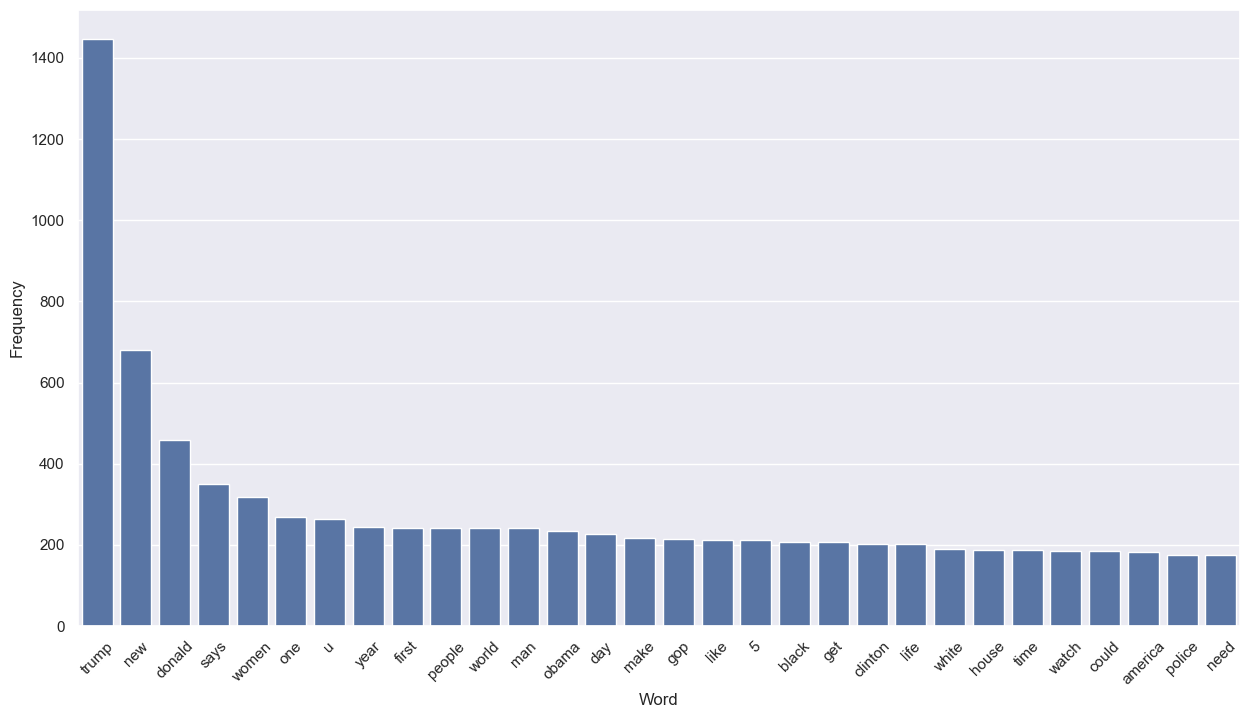

In [30]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_no_sarcasmo.iloc[:30].Word, y = df_no_sarcasmo.iloc[:30].Frequency)
plt.xticks(rotation=45)
plt.show()

## Riqueza lexica

In [31]:
conteo_palabras = len(todas_las_palabras)

In [32]:
conteo_palabras

103167

In [33]:
conteo_palabras_unicas=len(set(todas_las_palabras))

In [34]:
conteo_palabras_unicas

17336

#### cuanto más largo sea el texto, menos riqueza lexica habrá: el vocabulario es limitado, la longitud del texto no

In [35]:
conteo_palabras_unicas/conteo_palabras

0.16803822927874223

#### Sarcasmo

**Ejercicio 1** Rehacer el punto anterior pero para el dataset de sarcasmo

In [36]:
dataset_sarcasmo = dataset[dataset.is_sarcastic==1]
dataset_sarcasmo.head()

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1


## 4. Stemming
Por razones gramaticales muchas palabras pueden escribirse de manera distinta (debido a conjugación, género, número) pero tener el mismo significado para el texto. Por ejemplo si decimos "jugar", "jugando" o "juega", debido a como estan conjugadas, la computadora puede tratarlas como palabras distintas. Pero, en términos de significado, todas estan relacionadas al verbo Jugar. Muchas veces nos va a convenir unir todas estos términos en uno solo.

Una de las manera de hacer esto es por "STEMMING". El Stemming es un proceso eurístico que recorta la terminación de las palabras, agrupándolas por su raiz. Reduzcamos la cantidad de palabras diferentes en nuestro dataset utilizando este proceso.

a. Importar nuevamente el dataset completo

In [37]:
dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


b. Tomar del `dataset` solo las columnas de interes

In [38]:
dataset.drop(columns="article_link",inplace=True)

c. Antes de realizar el proceso de Stemming, vamos a normalizar el texto de la manera que ya estuvimos viendo. Le agregamos en este caso el uso de la libreria `re`, que nos permite sacar del texto todos los caracteres que no sean palabras. Notemos que hay veces que no conviene quitar estos caracteres ya que, por ejemplo, no podremos distiguir preguntas (?) o exclamaciones (!).

In [39]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [40]:
def normalizar_y_stemmizar(titular):
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular = re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular = titular.lower()
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [word for word in titular if word not in stopwords]
    ## Hasta aqui Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    return titular

In [41]:
dataset.headline.apply(normalizar_y_stemmizar)

0        former versac store clerk sue secret black cod...
1        roseann reviv catch thorni polit mood better wors
2                 start fear seri closest thing grandchild
3        boehner want wife listen come altern debt redu...
4                     rowl wish snape happi birthday magic
                               ...                        
26704                       american polit moral free fall
26705                                    america best hike
26706                                          repar obama
26707        isra target boycott support rais alarm abroad
26708                                   gourmet gift foodi
Name: headline, Length: 26709, dtype: object

d. Agregamos al dataset una columna llamado `titular_stem` que contenga los titulares stemmizados

In [42]:
dataset["titular_stem"] = dataset.headline.apply(normalizar_y_stemmizar)
dataset.tail()

,headline,is_sarcastic,titular_stem
26704,american politics in moral free-fall,0,american polit moral free fall
26705,america's best 20 hikes,0,america best hike
26706,reparations and obama,0,repar obama
26707,israeli ban targeting boycott supporters raise...,0,isra target boycott support rais alarm abroad
26708,gourmet gifts for the foodie 2014,0,gourmet gift foodi


e. Armamos un nuevo dataset llamado `dataset_stem` que contenga solo las columnas `titular_stem` e `is_sarcastic`

In [43]:
dataset_stem=dataset.drop(columns=["headline"])
dataset_stem.head()

,is_sarcastic,titular_stem
0,0,former versac store clerk sue secret black cod...
1,0,roseann reviv catch thorni polit mood better wors
2,1,start fear seri closest thing grandchild
3,1,boehner want wife listen come altern debt redu...
4,0,rowl wish snape happi birthday magic


## 5. Lemmatization

Otra manera de llevar distintas palabras a un raíz común en la que comparten un significado es mediante el procezo de 'Lemmatizar' el texto. Es similar al 'Stemming' pero un poco más educado, ya que intenta realizar el proceso teniendo en cuenta cuál es el rol que la palabra cumple en el texto. Esto quiere decir que su accionar será distinto si la palabra a lemmantizar está actuando como verbo, sustantivo, etc. 

Para usar las funciones que ofrece `nltk` para lemmantizar, tendremos primero que descargar la libreria `Wordnet`. Para eso ejecute la siguiente celda:
https://www.nltk.org/api/nltk.stem.wordnet.html

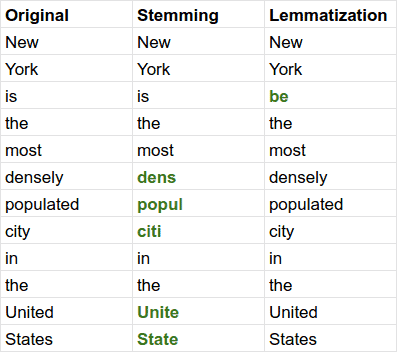

In [44]:
nltk.download()
# se abre una pestaña, buscadla en las ventans del pc aunque no os salga

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [45]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

### Veamos cómo actúa el lemmatizer sobre una frase de ejemplo.

In [46]:
# Oracion que usaremos como ejemplo
frase = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun."

# Hay que regularizar el texto. Dejar solo letra, pasar a minúsculas y tokenizar:

# Sacamos todo lo que no sean letras
frase = re.sub("[^a-zA-Z]"," ",str(frase))
# Pasamos a minúsculas
frase = frase.lower()
# Tokenizamos
frase_tokens = nltk.word_tokenize(frase)

# Veamos como cambians las palabras al lemmatizar
print("{0:20}{1:20}".format("Word","Lemma"))
# Esto es un ejemplo de como formatear palabras con espacios

for palabra in frase_tokens:
    print ("{0:20}{1:20}".format(palabra, wordnet_lemmatizer.lemmatize(palabra)))

Word                Lemma               
he                  he                  
was                 wa                  
running             running             
and                 and                 
eating              eating              
at                  at                  
same                same                
time                time                
he                  he                  
has                 ha                  
bad                 bad                 
habit               habit               
of                  of                  
swimming            swimming            
after               after               
playing             playing             
long                long                
hours               hour                
in                  in                  
the                 the                 
sun                 sun                 


¿Te sorprende lo que paso? No cambiaron casi nada (solo se fueron las "s" del final). El problema es que precisamos darle información extra al Lemmatizer, decirle qué rol está cumpliendo la palabra en la oración. Si os fijais en la documentación, esto se hace pasandole un argumento extra a la función llamado POS (Part Of Speech).

Hay distintos metodos que intentan averiguar el rol que cumple una palabra en una oración. Nosotros vamos a utilizar uno que viene incorporado en NLTK llamado pos_tag.

https://www.guru99.com/pos-tagging-chunking-nltk.html

https://www.nltk.org/api/nltk.stem.wordnet.html

In [47]:
wordnet_lemmatizer.lemmatize('swimming', 'n') # n de nombre

'swimming'

In [48]:
wordnet_lemmatizer.lemmatize('swimming', 'v') # v de verbo

'swim'

In [49]:
print(nltk.pos_tag(frase_tokens))

[('he', 'PRP'), ('was', 'VBD'), ('running', 'VBG'), ('and', 'CC'), ('eating', 'VBG'), ('at', 'IN'), ('same', 'JJ'), ('time', 'NN'), ('he', 'PRP'), ('has', 'VBZ'), ('bad', 'JJ'), ('habit', 'NN'), ('of', 'IN'), ('swimming', 'NN'), ('after', 'IN'), ('playing', 'VBG'), ('long', 'JJ'), ('hours', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('sun', 'NN')]


In [50]:
print(nltk.pos_tag(["Laura","teachs","math"])) # le pasamos una lista de palabras y nos devuelve una lista de tuplas
i = 0 # es el numero de la palabra en la frase
print(nltk.pos_tag(["Laura","teachs","math"])[i]) # escogemos la primera tupla(la de 'teachs')
print(nltk.pos_tag(["Laura","teachs","math"])[i][1]) # escogemos el segundo elemento de la tupla
print(nltk.pos_tag(["Laura","teachs","math"])[i][1][0].lower()) # solo nos interesará una letra para decidir que tipo de palabra es

[('Laura', 'NNP'), ('teachs', 'VBZ'), ('math', 'NN')]
('Laura', 'NNP')
NNP
n


In [51]:
from nltk.corpus import wordnet
wordnet.ADV

'r'

Las etiquetas refieren al tipo de palabra. Vamos a definir una función para traducir estas etiquetas a los valores de POS que entiende `wordnet_lemmatizer`.

In [52]:
tag_dict = {"J": wordnet.ADJ, # Adjetivo
                "N": wordnet.NOUN, # Nombre
                "V": wordnet.VERB, # Verbo
                "R": wordnet.ADV} # adverbio
tag_dict.get("uuuu", wordnet.NOUN)

'n'

In [53]:
# for items in nltk.pos_tag(frase_tokens):
#     print(items[0], "->", items[1][0].lower())

from nltk.corpus import wordnet

def lemmatizer_get_wordnet_pos_phrase(frase_tokens):

    new_tokens=[] # esto estará lematizado
    pos_tokens=[]
    
    tag_dict = {"J": wordnet.ADJ, # Adjetivo (a)
                "N": wordnet.NOUN, # Nombre (n)
                "V": wordnet.VERB, # Verbo (v)
                "R": wordnet.ADV} # adverbio (r)
    # esta función devuelve la lista de tuplas 
    words_and_pos=nltk.pos_tag(frase_tokens)
    # [('Laura', 'NNP'), ('teachs', 'VBZ'), ('math', 'NN')]
    
    for items in words_and_pos:
        pos = tag_dict.get(items[1][0], wordnet.NOUN)
        new_tokens.append(wordnet_lemmatizer.lemmatize(items[0], pos))
        pos_tokens.append(pos)

    return new_tokens, pos_tokens

lemmatizer_get_wordnet_pos_phrase(["Laura","teachs","math"])

(['Laura', 'teach', 'math'], ['n', 'v', 'n'])

Veamos finalmente como funciona en nuestro ejemplo.

In [54]:
frase_lemma, tipo_palabra = lemmatizer_get_wordnet_pos_phrase(frase_tokens)

# Veamos como cambiaron las palabras
print("{0:20}{1:20}{2:20}".format("Palabra:","Tipo:","Lemma:"))
for i in range(len(frase_tokens)):
    print ("{0:20}{1:20}{2:20}".format(frase_tokens[i],tipo_palabra[i],frase_lemma[i]))

Palabra:            Tipo:               Lemma:              
he                  n                   he                  
was                 v                   be                  
running             v                   run                 
and                 n                   and                 
eating              v                   eat                 
at                  n                   at                  
same                a                   same                
time                n                   time                
he                  n                   he                  
has                 v                   have                
bad                 a                   bad                 
habit               n                   habit               
of                  n                   of                  
swimming            n                   swimming            
after               n                   after               
playing             v   

a. Ahora te toca aplicar todo esto a nuestro dataset. Vamos a volver a importarlo y hacer un procedimiento análogo al que hicimos para la parte de Stemming.

In [55]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos esta libreria que nos permite reemplzar caracteres
import re

dataset = pd.read_json('Sarcasm_Headlines_Dataset.json', lines= True)
dataset = dataset.drop(columns=["article_link"])
dataset.dropna(axis=0,inplace=True)

# Traemos nuevamente las stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [56]:
def normalizar_lemmatizar(titular):
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular=re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular=titular.lower()
     # Tokenizamos para separar las palabras
    titular=nltk.word_tokenize(titular)
    
     # Aplicamos el Lemmatizer (Esto puede tardar un ratito)
    titular, tipo_palabra = lemmatizer_get_wordnet_pos_phrase(titular)
    # tipo_palabra no lo utilizamos
    
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [word for word in titular if word not in stopwords]
    ## Hasta aqui Normalizamos

    # Por ultimo volvemos a unir el titular
    titular = " ".join(titular)
    return titular

In [57]:
dataset["titular_lemm"] = dataset.headline.apply(normalizar_lemmatizar)
dataset.tail()

,headline,is_sarcastic,titular_lemm
26704,american politics in moral free-fall,0,american politics moral free fall
26705,america's best 20 hikes,0,america best hike
26706,reparations and obama,0,reparation obama
26707,israeli ban targeting boycott supporters raise...,0,israeli target boycott supporter raise alarm a...
26708,gourmet gifts for the foodie 2014,0,gourmet gift foodie


b. Por último nos armamos un nuevo datasate llamado `dataset_lem` que tenga solo las columnas `titular_lemm` y `is_sarcastic`.

In [58]:
dataset_lemm = dataset.drop(columns=["headline"])
dataset_lemm.head()

,is_sarcastic,titular_lemm
0,0,former versace store clerk secret black code m...
1,0,roseanne revival catch thorny political mood good
2,1,start fear series closest thing grandchild
3,1,boehner want wife listen come alternative debt...
4,0,rowling wish snape happy birthday magical



## 6. Vectorizar

Hasta ahora, tenemos un grupo de palabras por cada titular (bag of words). La idea ahora es representar esta lista de palabras como un vector. Para esto vamos a utilizar la función `CountVectorizer` de Scikit-Learn. Esta función nos permite representar cada título por un vector con un `1` en las palabras que contiene y un `0` en las que no. Además, vamos a trabajar únicamente con las palabras que aparecen más veces en el texto, ya que las que aparecen una única vez o pocas veces no nos van a brindar información que se pueda generalizar.


a. Preparamos el conversor de bag of words a vectores que traemos de sklearn. `CountVectorizer` posee varias funcionalidades que pueden determinarse a partir de parámetros. Les recomendamos fuertemente leer su documentación.

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 1000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=1000

# Es decir que cada instancia tendrá 1000 features
cou_vec = CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

Notemos que desde `CountVectorizer` se pueden quitar las stopwords (algo que ya hicimos con `nltk`) e incluir los n_gramas automáticamente.
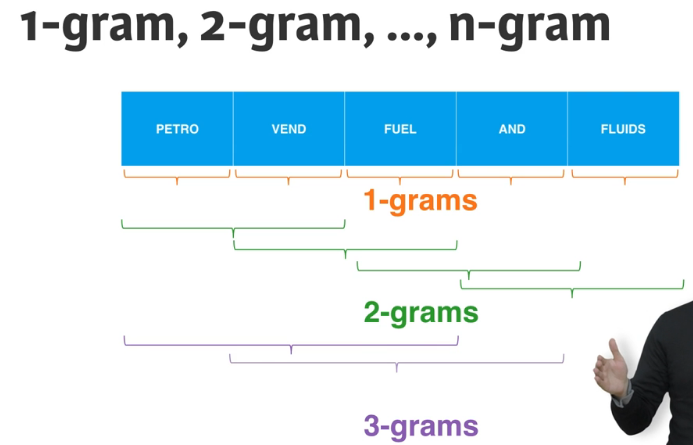

c. Ahora sí, vamos generarnos los vectores para cada título a partir del corpus total.

In [60]:
matriz_titulos = cou_vec.fit_transform(dataset_lemm['titular_lemm'])

# Tomamos las palabras
all_words = cou_vec.get_feature_names_out()

# Vizualizamos las 50 primeras palabras
print("50 primeras palabras: ", all_words[0:50])

50 primeras palabras:  ['abortion' 'abuse' 'accept' 'accidentally' 'accord' 'accuse' 'across'
 'action' 'activist' 'actor' 'actually' 'address' 'administration' 'admit'
 'admits' 'adorable' 'advice' 'afghanistan' 'agent' 'agree' 'ahead'
 'airline' 'airport' 'album' 'allegation' 'allow' 'almost' 'already'
 'also' 'always' 'amazon' 'america' 'american' 'amid' 'among' 'animal'
 'anniversary' 'announce' 'announces' 'another' 'answer' 'anti' 'anyone'
 'anything' 'apartment' 'apologize' 'apparently' 'appear' 'apple'
 'archive']


In [61]:
len(all_words)

1000

In [62]:
cou_vec.vocabulary_

{'former': 340,
 'store': 844,
 'secret': 775,
 'black': 92,
 'catch': 131,
 'political': 647,
 'good': 367,
 'start': 834,
 'fear': 311,
 'series': 787,
 'thing': 896,
 'want': 956,
 'wife': 976,
 'listen': 500,
 'come': 172,
 'idea': 426,
 'wish': 982,
 'happy': 386,
 'birthday': 91,
 'world': 989,
 'woman': 984,
 'case': 129,
 'send': 784,
 'school': 766,
 'work': 987,
 'company': 178,
 'leave': 485,
 'campaign': 118,
 'friday': 346,
 'morning': 558,
 'email': 276,
 'inside': 434,
 'trump': 927,
 'airline': 21,
 'passenger': 617,
 'bomb': 101,
 'threat': 901,
 'facebook': 300,
 'reportedly': 724,
 'feature': 312,
 'north': 588,
 'korea': 470,
 'urge': 939,
 'voter': 951,
 'hillary': 402,
 'actually': 10,
 'hold': 406,
 'huge': 420,
 'protest': 678,
 'support': 863,
 'refugee': 711,
 'nuclear': 591,
 'lawyer': 480,
 'forward': 341,
 'legal': 486,
 'team': 882,
 'year': 996,
 'market': 524,
 'program': 674,
 'build': 111,
 'city': 156,
 'artist': 53,
 'clear': 161,
 'assure': 56,
 'na

## 7. Modelar

Ahora sí estamos listos para usar todo nuestro conocimiento de modelos en este set de datos. Tengamos en cuenta que, dependiendo el número de palabras (features) que hayamos elegido, los modelos pueden tardar un rato en entrenarse.

a. Primero, como siempre, separamos en test y train.

In [63]:
print(matriz_titulos)

  (0, 340)	1
  (0, 844)	1
  (0, 775)	1
  (0, 92)	1
  (1, 131)	1
  (1, 647)	1
  (1, 367)	1
  (2, 834)	1
  (2, 311)	1
  (2, 787)	1
  (2, 896)	1
  (3, 956)	1
  (3, 976)	1
  (3, 500)	1
  (3, 172)	1
  (3, 426)	1
  (4, 982)	1
  (4, 386)	1
  (4, 91)	1
  (5, 989)	1
  (5, 984)	1
  (6, 129)	1
  (7, 784)	1
  (7, 766)	1
  (7, 987)	1
  :	:
  (26699, 347)	1
  (26699, 4)	1
  (26700, 172)	1
  (26701, 758)	1
  (26701, 620)	1
  (26701, 288)	1
  (26702, 32)	1
  (26702, 306)	1
  (26702, 319)	1
  (26702, 110)	1
  (26703, 153)	1
  (26703, 651)	1
  (26703, 343)	1
  (26703, 963)	1
  (26704, 32)	1
  (26704, 345)	1
  (26704, 305)	1
  (26704, 648)	1
  (26705, 31)	1
  (26705, 85)	1
  (26706, 593)	1
  (26707, 693)	1
  (26707, 864)	1
  (26707, 878)	1
  (26708, 359)	1


In [64]:
pd.DataFrame(matriz_titulos.toarray(), columns=all_words).head()

,abortion,abuse,accept,accidentally,accord,accuse,across,action,activist,actor,...,worry,worth,would,write,writer,wrong,year,york,young,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
x = matriz_titulos.toarray()
y = dataset_lemm['is_sarcastic']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)

Tambien definimos una función que nos permite plotear los resultados en una matriz de confusión.

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["No Sarcastico","Sarcastico"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

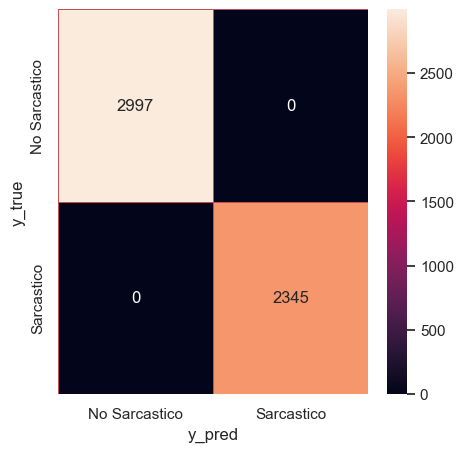

In [67]:
confusion(ytest,ytest) # esto es solo un ejemplo

### Naive Bayes
a. Empecemos por un Naive Bayes para tener un benchmark de referencia para el accuracy.

In [68]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [69]:
yhat = nb.predict(xtest) # > 0.5

b. Veamos cómo queda graficada la matriz de confusión:

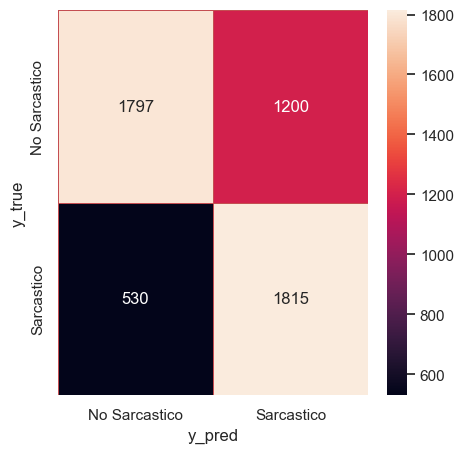

In [70]:
confusion(ytest, yhat)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,yhat)

0.6761512542119057

### Random Forest
a. Veamos cómo funciona un random forest para predecir el sarcasmo de una nota en base a su titular.

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=20,min_samples_split=20)
rf.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=20, min_samples_split=20)

In [106]:
yhat = rf.predict(xtest)

In [107]:
accuracy_score(ytest,yhat)

0.6666042680643953

b. Grafica la matriz de confusión:

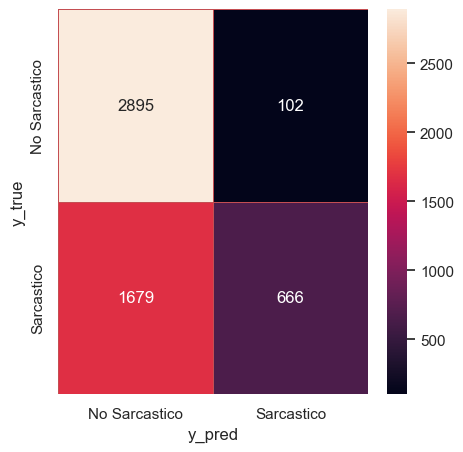

In [108]:
confusion(ytest, yhat)

c. Habíamos dicho que algo muy bueno de Random Forest era poder preguntarle por la importancia de los features que uso para clasificar. Veamos en este caso cuales son las palabras que mayormente determinan el sarcasmo de una nota para este clasificador.

In [109]:
importances=pd.DataFrame([all_words,rf.feature_importances_], index=["feature","importance"]).T
print(importances.sort_values("importance", ascending = False).head(10))

         feature importance
50          area   0.083888
920  transgender   0.076721
721       repeal   0.042198
576       nearly   0.041718
252         door   0.041358
251       donald   0.030562
509         loss   0.023514
846        story    0.02344
351         fund   0.022068
445       israel   0.021467


## 7. Explora las posibilidades

Algunas sugerencias para explorar son las siguientes:

1. Prueba con Stemmizar en vez de lemmantizar
1. Cambia el numero de features que esta tomando.
1. Incluye los 2-gramas. ¿Qué era eso?


In [82]:
def normalizar_y_stemmizar(titular):
    # Vamos a reemplzar los caracteres que no sean letras por espacios
    titular = re.sub("[^a-zA-Z]"," ",str(titular))
    # Pasamos todo a minúsculas
    titular = titular.lower()
    titular = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(titular)
    # Eliminamos las palabras de menos de 3 letras
    titular = [palabra for palabra in titular if len(palabra)>3]
    # Sacamos las Stopwords
    titular = [word for word in titular if word not in stopwords]
    ## Hasta aqui Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    titular=[stemmer.stem(palabra) for palabra in titular]
    # Por ultimo volvemos a unir el titular
    titular=" ".join(titular)
    return titular

In [84]:
dataset.head()

,headline,is_sarcastic,titular_lemm
0,former versace store clerk sues over secret 'b...,0,former versace store clerk secret black code m...
1,the 'roseanne' revival catches up to our thorn...,0,roseanne revival catch thorny political mood good
2,mom starting to fear son's web series closest ...,1,start fear series closest thing grandchild
3,"boehner just wants wife to listen, not come up...",1,boehner want wife listen come alternative debt...
4,j.k. rowling wishes snape happy birthday in th...,0,rowling wish snape happy birthday magical


In [87]:
dataset['titular_stem']=dataset.headline.apply(normalizar_y_stemmizar)

In [95]:
cou_vec = CountVectorizer(max_features=1000, max_df=0.9,ngram_range=(1, 2))

In [96]:
X=cou_vec.fit_transform(dataset['titular_stem'])

In [110]:
X = X.toarray()
y = dataset_lemm['is_sarcastic']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,random_state=42,stratify=y)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [111]:

rf=RandomForestClassifier(max_depth=20, min_samples_split=30)
rf.fit(xtrain,ytrain)


RandomForestClassifier(max_depth=20, min_samples_split=30)

In [112]:
yhat = rf.predict(xtest)

In [113]:
accuracy_score(ytest,yhat)

0.667353051291651

b. Grafica la matriz de confusión:

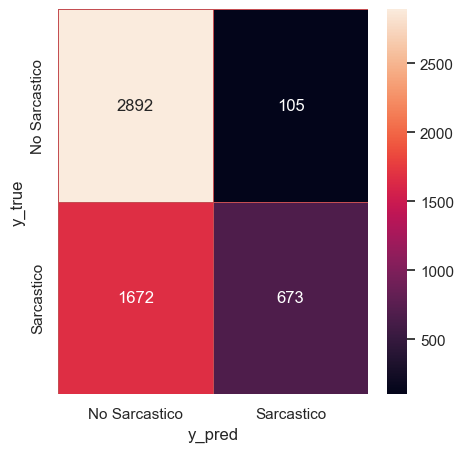

In [114]:
confusion(ytest, yhat)

### El modelo no sale muy bién, casi todo lo clasifica en no sarcastico, podríamos seguir investigando para ver como corregir esto